<a href="https://colab.research.google.com/github/jfestradan/Procesamiento_Digital_De_Senales/blob/master/PDS_Filtros_Juan_Felipe_Estrada_Naranjo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ffmpeg -i DaftPunk-InstantCrush.mp3 output.wav 

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [2]:
!pip install soundfile

In [3]:
#por facilidad de proceso se sugiere utilizar el paquete ffmpeg compilado - 
#ffmpeg.exe debe estar en el directorio actual para convertir los archivos
#de audio a .wav
#link descarga ffmpeg: https://ffmpeg.zeranoe.com/builds/

import soundfile as sf # para instalar pip install soundfile 
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 44100.00[Hz]
audio output.wav


butter:

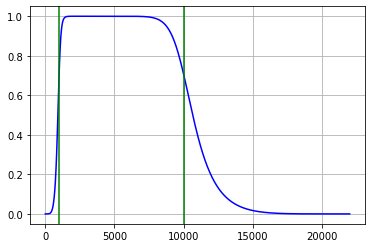

In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

xpro = x.copy()
order=5
f1 = 1000
f2 = 10000
nyq = 0.5 * fs
low = f1 / nyq
high = f2 / nyq
b, a = signal.butter(order, [low, high], btype='band' )
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='green') # cutoff frequency
plt.axvline(abs(f2), color='green') # cutoff frequency 

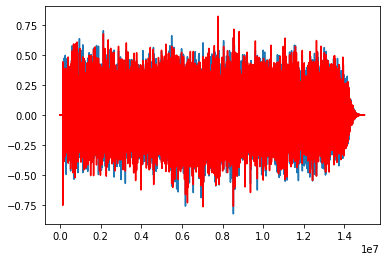

In [5]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'r')

In [6]:
Y=np.array([y_1,y_2])
Ywf=np.transpose(Y)

name_out_fil = 'new_filebt.wav'
sf.write(name_out_fil,np.real(y_1), fs)


Cheby1:

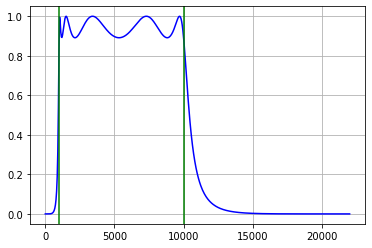

In [7]:
order=5
rp=1
f1 = 1000
f2 = 10000
nyq = 0.5 * fs
low = f1 / nyq
high = f2 / nyq
b, a = signal.cheby1(order, rp, [low, high], btype='band')
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='green') # cutoff frequency
plt.axvline(abs(f2), color='green') # cutoff frequency
plt.show()

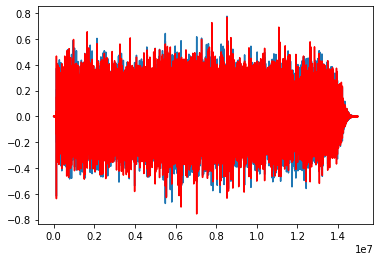

In [8]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'r')

In [9]:
Y=np.array([y_1,y_2])
Ywf=np.transpose(Y)

name_out_fil = 'new_filech.wav'
sf.write(name_out_fil,np.real(y_1), fs)

Cheby2:

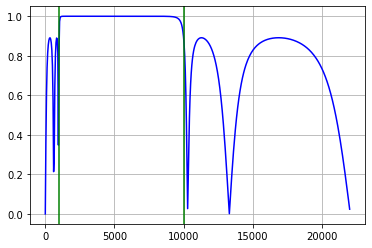

In [10]:
order=5
rp=1
f1 = 1000
f2 = 10000
nyq = 0.5 * fs
low = f1 / nyq
high = f2 / nyq
b, a = signal.cheby2(order, rp, [low, high], btype='band')
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='green') # cutoff frequency
plt.axvline(abs(f2), color='green') # cutoff frequency
plt.show()

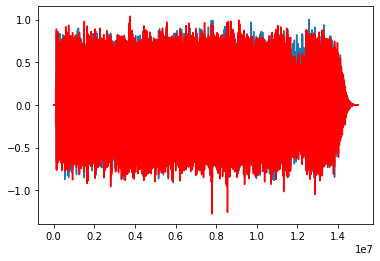

In [11]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'r')

In [12]:
Y=np.array([y_1,y_2])
Ywf=np.transpose(Y)

name_out_fil = 'new_filech2.wav'
sf.write(name_out_fil,np.real(y_1), fs)


bessel:

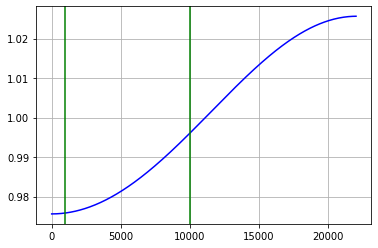

In [13]:

rp=1
rs=40
f1 = 1000
f2 = 10000
nyq = 0.5 * fs
low = f1 / nyq
high = f2 / nyq
b, a = signal.bessel(rp, rs, 'low', analog=True)
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='green') # cutoff frequency
plt.axvline(abs(f2), color='green') # cutoff frequency
plt.show()

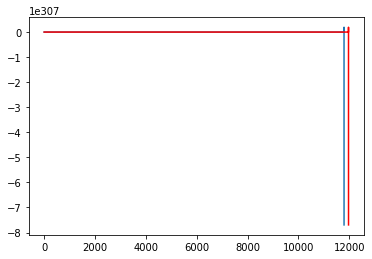

In [14]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'r')

Y=np.array([y_1,y_2])
Ywf=np.transpose(Y)

name_out_fil = 'new_filebes.wav'
sf.write(name_out_fil,np.real(y_1), fs)

elyptic:

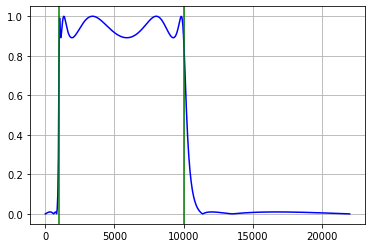

In [15]:
order=5
rp=1
rs=40
f1 = 1000
f2 = 10000
nyq = 0.5 * fs
low = f1 / nyq
high = f2 / nyq
b, a = signal.ellip(order, rp, rs, [low, high], btype='band')
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='green') # cutoff frequency
plt.axvline(abs(f2), color='green') # cutoff frequency
plt.show()

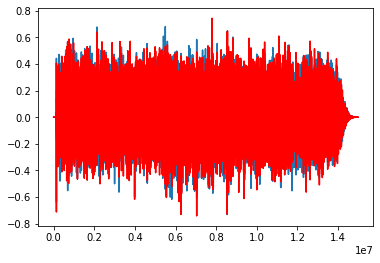

In [16]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'r')

In [17]:
Y=np.array([y_1,y_2])
Ywf=np.transpose(Y)

name_out_fil = 'new_fileely.wav'
sf.write(name_out_fil,np.real(y_1), fs)
